<a href="https://colab.research.google.com/github/EmmaKLofthouse/vegetable_identifier/blob/basic_cnn/basic_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


# VegNet: Neural Network Vegetable Classifier

> This notebook contains code for the development of a basic CNN from scratch.


# Table of Contents

...

# Introduction

In this project, we utilize deep learning, particularly convolutional neural networks (CNNs), to automatically identify different types of vegetables from images. By leveraging a diverse training dataset collected from google images and CNN architectures, our model learns to discern intricate features and patterns, enabling precise vegetable classification. With applications ranging from optimizing inventory management to aiding in crop monitoring, our work aims to streamline processes and enhance efficiency in agriculture and culinary domains.

After downloading, cleaning and organising the image files (see data_cleaning.ipynb), we now begin the model building by creating a simple CNN using TensorFlow.

# Load modules

In [376]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Load Raw data into keras

In [377]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Projects/vegetable_identifier/raw_images')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 200 files belonging to 2 classes.


# Pre-process Data

In [379]:
# Scale the pixel data to between 0 and 1
data= data.map(lambda x,y: (x/255.,y))

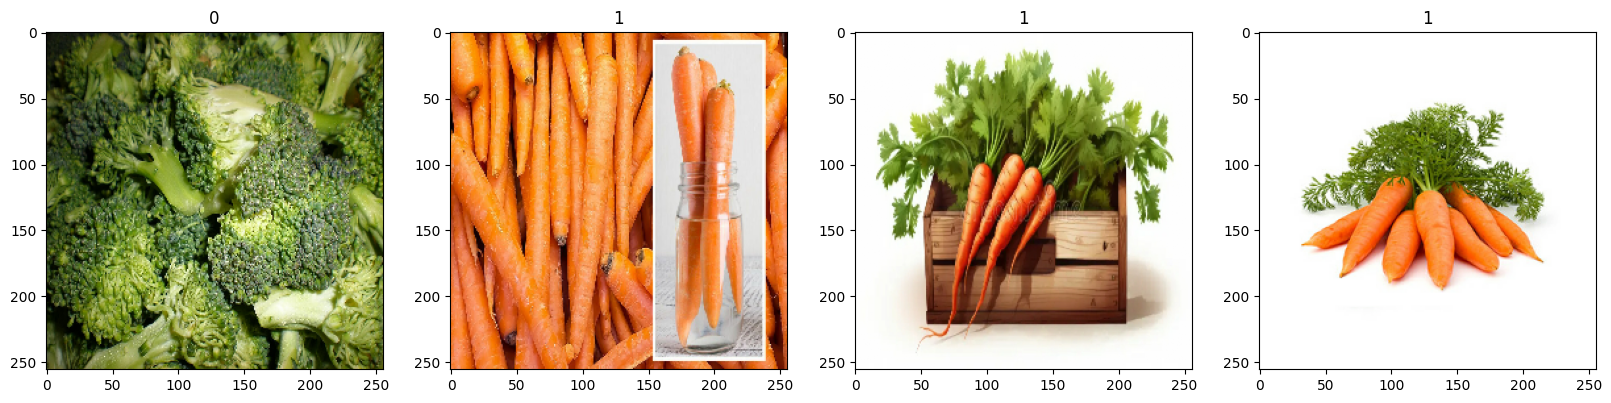

In [380]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [381]:
# Split into train, validation and test samples
n_batchs = len(data)
train_size = int(n_batchs*0.6)
val_size = int(n_batchs*0.2)+1
test_size = int(n_batchs*0.2)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

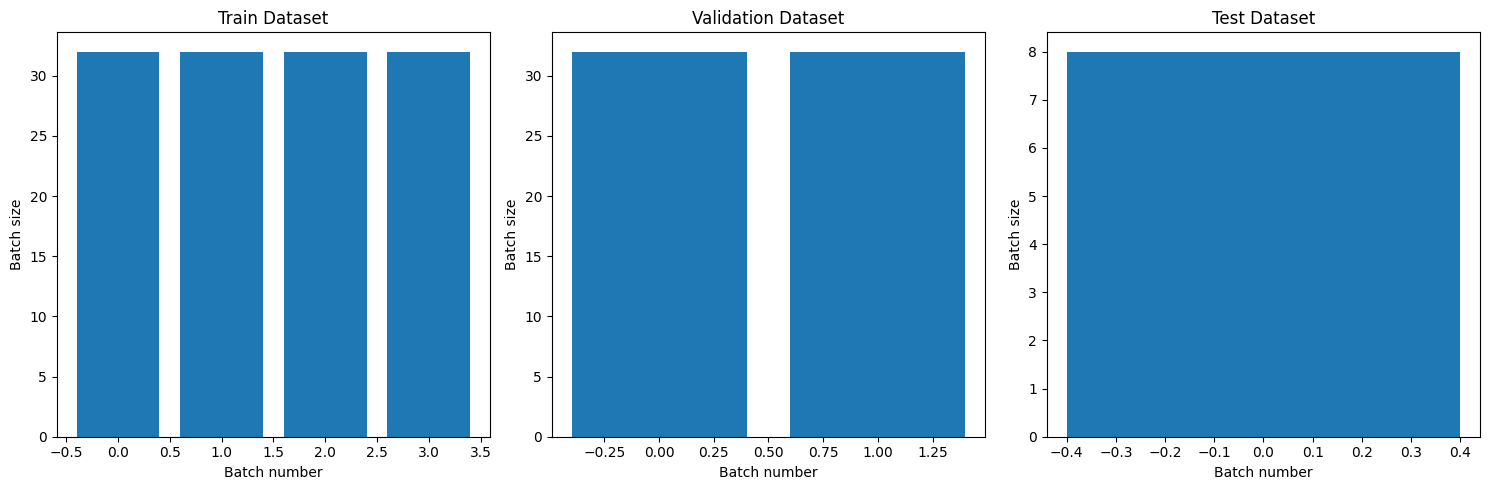

In [382]:
def plot_batch_sizes(ds, subplot_title):
    batch_sizes = [batch[0].shape[0] for batch in ds]
    plt.xlabel('Batch number')
    plt.ylabel('Batch size')
    plt.title(subplot_title)
    plt.bar(range(len(batch_sizes)), batch_sizes)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_batch_sizes(train, 'Train Dataset')

plt.subplot(1, 3, 2)
plot_batch_sizes(val, 'Validation Dataset')

plt.subplot(1, 3, 3)
plot_batch_sizes(test, 'Test Dataset')

plt.tight_layout()
plt.show()

# Build a simple CNN

In [383]:
def create_simple_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, (3, 3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(16, (3, 3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    #model.add(Dense(num_classes, activation='softmax'))
    model.add(Dense(1,activation="sigmoid"))
    return model

input_shape = (256,256, 3)  # Shape of processed images
num_classes = 2  # Number of vegetable categories

# Create the CNN model
model = create_simple_cnn(input_shape, num_classes)


In [384]:
# Display the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 16)       

In [385]:
# Compile the model
model.compile(optimizer=Adam(),
              loss=tf.losses.BinaryCrossentropy(), #binary_crossentropy",#'categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [386]:
log_dir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [387]:
hist= model.fit(train,
                epochs=15,
                validation_data=val,
                callbacks=[tensorboard_callback])

Epoch 1/15
4/4 [==============================] - 17s 4s/step - loss: 0.8999 - accuracy: 0.5547 - val_loss: 0.6518 - val_accuracy: 0.5312
Epoch 2/15
4/4 [==============================] - 15s 3s/step - loss: 0.5320 - accuracy: 0.7266 - val_loss: 0.3508 - val_accuracy: 0.9219
Epoch 3/15
4/4 [==============================] - 15s 4s/step - loss: 0.2015 - accuracy: 0.9688 - val_loss: 0.0878 - val_accuracy: 0.9531
Epoch 4/15
4/4 [==============================] - 15s 4s/step - loss: 0.1129 - accuracy: 0.9453 - val_loss: 0.0923 - val_accuracy: 0.9688
Epoch 5/15
4/4 [==============================] - 13s 3s/step - loss: 0.1323 - accuracy: 0.9609 - val_loss: 0.0454 - val_accuracy: 0.9844
Epoch 6/15
4/4 [==============================] - 12s 2s/step - loss: 0.1787 - accuracy: 0.9688 - val_loss: 0.1583 - val_accuracy: 0.9688
Epoch 7/15
4/4 [==============================] - 15s 3s/step - loss: 0.0888 - accuracy: 0.9922 - val_loss: 0.0814 - val_accuracy: 0.9375
Epoch 8/15
4/4 [==================

# plot performance


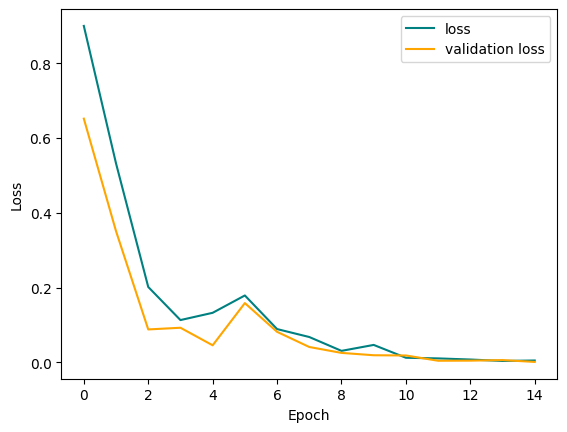

In [388]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='validation loss')
plt.legend(loc='best')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Accuracy

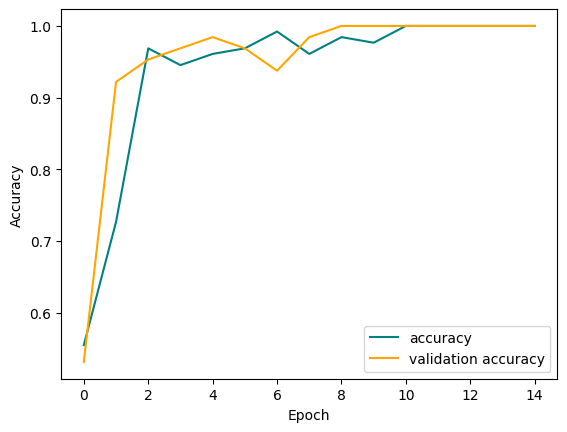

In [389]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='validation accuracy')
plt.legend(loc='best')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Evaluate the model performance

1/1 [==============================] - 0s 171ms/step


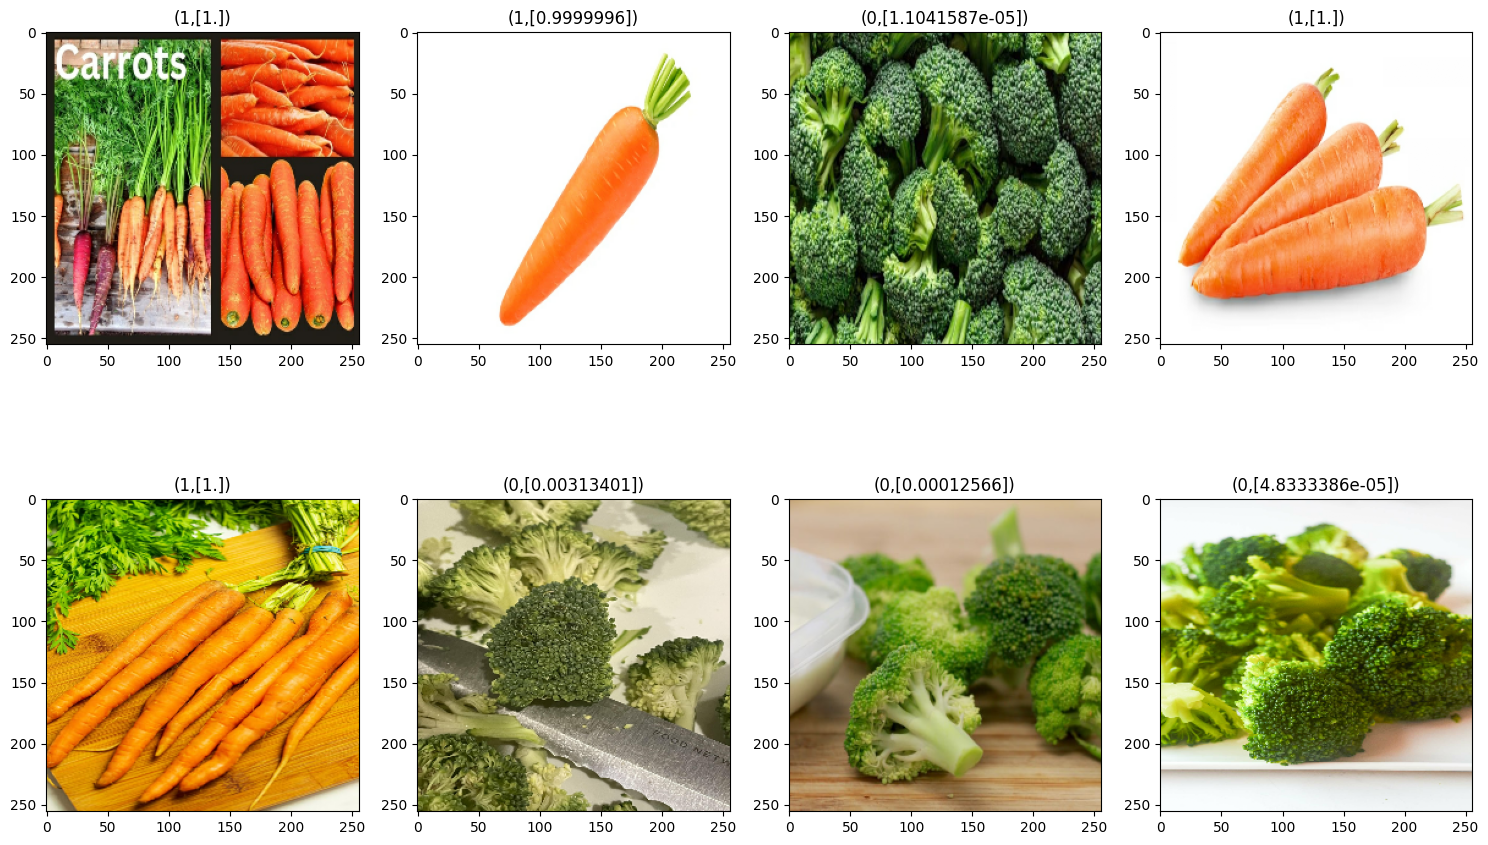

In [390]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

plt.figure(figsize=(15, 10))

for batch in test.as_numpy_iterator():
    X, y = batch

    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

    for idx, img in enumerate(X):
        plt.subplot(2, len(X)//2, idx+1)
        plt.imshow(img)
        plt.title(f"({y[idx]},{yhat[idx]})")

plt.tight_layout()
plt.show()

In [391]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# predictions on test set

In [394]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Projects/vegetable_identifier/raw_images/broccoli_test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

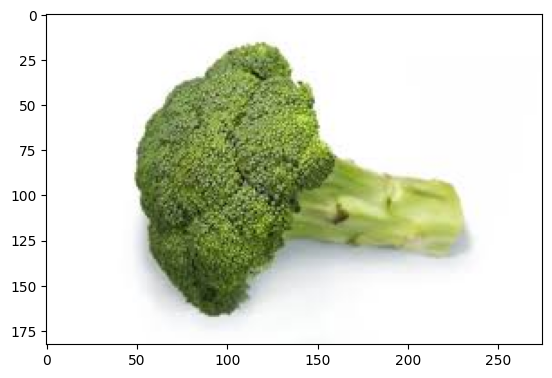

In [395]:
plt.imshow(img)
plt.show()

In [396]:
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat


1/1 [==============================] - 0s 65ms/step


array([[0.00011123]], dtype=float32)

In [397]:
if yhat > 0.5:
    print(f'Predicted class is carrot')
else:
    print(f'Predicted class is broccoli')


Predicted class is broccoli


# Save model

In [398]:
from keras.models import load_model
model_name = 'VegNet_basicCNN'
model.save(os.path.join('/content/drive/MyDrive/Projects/vegetable_identifier/models',model_name))

In [399]:
# To read in the model:
new_model = load_model(os.path.join('/content/drive/MyDrive/Projects/vegetable_identifier/models',model_name))

In [400]:
# To run on new data:
img = cv2.imread('/content/drive/MyDrive/Projects/vegetable_identifier/raw_images/carrot_test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted class is carrot')
else:
    print(f'Predicted class is broccoli')


1/1 [==============================] - 0s 37ms/step
Predicted class is carrot
